In [1]:
import numpy as np
from functools import cmp_to_key
import os
import sys
import time
import math
import copy
import matplotlib.pyplot as plt

# ArraysAlgos

In [2]:
def binary_search(arr, x):
        low = 0
        high = len(arr) - 1
        mid = 0

        while low <= high:

            mid = (high + low) // 2

            # If x is greater, ignore left half
            if arr[mid] < x:
                low = mid + 1

            # If x is smaller, ignore right half
            elif arr[mid] > x:
                high = mid - 1

            # means x is present at mid
            else:
                return mid

        # If we reach here, then the element was not present
        return -1

class ArraysAlgos:

    def cloneItemSetMinusOneItem(itemset, itemToRemove):
        newItemset = [0] * (len(itemset) - 1)
        i = 0
        for j in range(len(itemset)):
            if(itemset[j] != itemToRemove):
                newItemset[i] = itemset[j]
                i += 1
        return newItemset

    def cloneItemSetMinusAnItemset(itemset, itemsetToNotKeep):
        newItemset = [0] * (len(itemset) - len(itemsetToNotKeep))
        i = 0
        itemsetToNotKeep = sorted(itemsetToNotKeep)
        for j in range(len(itemset)):
            if binary_search(itemsetToNotKeep, itemset[j]) < 0:
                if i < len(newItemset):
                    newItemset[i] = itemset[j]
                    i += 1
        return newItemset

    def allTheSameExceptLastItem(itemset1, itemset2):
        for i in range(len(itemset1) - 1):
            if itemset1[i] != itemset2[i]:
                return False
        return True

    def concatenate(prefix, suffix):
        concatenation = prefix + suffix
        return concatenation

    def intersectTwoSortedArrays(array1, array2):
        newArray = []
        pos1 = 0
        pos2 = 0
        while pos1 < len(array1) and pos2 < len(array2):
            if array1[pos1] < array2[pos2]:
                pos1 += 1
            elif array2[pos2] < array1[pos1]:
                pos2 += 1
            else:
                newArray.append(array1[pos1])
                pos1 += 1
                pos2 += 1
        return newArray

    def containsOrEquals(itemset1, itemset2):
        for item in itemset2:
            found = False
            for value in itemset1:
                if value == item:
                    found = True
                    break
                elif value > item:
                    return False
            if not found:
                return False
        return True

    def containsLEX(itemset, item, maxItemInArray):
        if item > maxItemInArray:
            return False
        for itemI in itemset:
            if itemI == item:
                return True
            elif itemI > item:
                return False
        return False

    def sameAs(itemset1, itemset2, posRemoved):
        j = 0
        for i in range(len(itemset1)):
            if j == posRemoved:
                j += 1
            if itemset1[i] == itemset2[j]:
                j += 1
            elif itemset1[i] > itemset2[j]:
                return 1
            else:
                return -1
        return 0

    def includedIn(itemset1, itemset2):
        count = 0
        for i in range(len(itemset2)):
            if itemset2[i] == itemset1[count]:
                count += 1
                if count == len(itemset1):
                    return True
        return False

    def includedIn(itemset1, itemset1Length, itemset2):
        count = 0
        for i in range(len(itemset2)):
            if itemset2[i] == itemset1[count]:
                count += 1
                if count == itemset1Length:
                    return True
        return False

    def containsLEXPlus(itemset, item):
        for i in range(len(itemset)):
            if itemset[i] == item:
                return True
            elif itemset[i] > item:
                return True
        return False

    def containsLEX(itemset, item):
        for i in range(len(itemset)):
            if itemset[i] == item:
                return True
            elif itemset[i] > item:
                return False
        return False

    def contains(itemset, item):
        for i in range(len(itemset)):
            if itemset[i] == item:
                return True
            elif itemset[i] > item:
                return False
        return False

    def comparatorItemsetSameSize(itemset1, itemset2):
        # Iterate through each item in the itemsets
        for i in range(len(itemset1)):
            # If the current item is smaller in the first itemset
            if itemset1[i] < itemset2[i]:
                return -1  # The first itemset is smaller
            # If the current item is larger in the first itemset
            elif itemset2[i] < itemset1[i]:
                return 1  # The first itemset is larger
            # Otherwise, they are equal, so the next item in both itemsets will be compared next.

        return 0  # Both itemsets are equal

    def appendIntegerToArray(array, integer):
        newgen = array + [integer]
        return newgen

    def convertStringArrayToDoubleArray(tokens):
        numbers = [float(token) for token in tokens]
        return numbers

    def isSubsetOf(itemset1, itemset2):
        if itemset1 is None or len(itemset1) == 0:
            return True
        for val in itemset1:
            found = False
            for value in itemset2:
                if value > val:
                    return False
                elif val == value:
                    found = True
                    break
            if not found:
                return False
        return True

    def concatenate(itemset1, itemset2):
        concatenation = itemset1 + itemset2
        return concatenation


# AbstractItemset

In [3]:
class AbstractItemset:
    def __init__(self):
        pass

    def size(self):
        pass

    def __str__(self):
        pass

    def print(self):
        print(self.__str__())

    def getAbsoluteSupport(self):
        pass

    def getRelativeSupport(self, nbObject):
        pass

    def getRelativeSupportAsString(self, nbObject):
        frequence = self.getRelativeSupport(nbObject)
        return "{:.5f}".format(frequence)

    def contains(self, item):
        pass


class AbstractOrderedItemset(AbstractItemset):
    def __init__(self):
        super().__init__()

    def getAbsoluteSupport(self):
        pass

    def size(self):
        pass

    def get(self, position):
        pass

    def getLastItem(self):
        return self.get(self.size() - 1)

    def __str__(self):
        if self.size() == 0:
            return "EMPTYSET"

        r = ""
        for i in range(self.size()):
            r += str(self.get(i)) + " "
        return r

    def getRelativeSupport(self, nbObject):
        return float(self.getAbsoluteSupport()) / float(nbObject)

    def contains(self, item):
        for i in range(self.size()):
            if self.get(i) == item:
                return True
            elif self.get(i) > item:
                return False
        return False

    def containsAll(self, itemset2):
        if self.size() < itemset2.size():
            return False

        i = 0
        for j in range(itemset2.size()):
            found = False
            while not found and i < self.size():
                if self.get(i) == itemset2.get(j):
                    found = True
                elif self.get(i) > itemset2.get(j):
                    return False
                i += 1

            if not found:
                return False
        return True

    def isEqualTo(self, itemset2):
        if self.size() != itemset2.size():
            return False

        for i in range(itemset2.size()):
            if itemset2.get(i) != self.get(i):
                return False
        return True

    # def isEqualTo(self, itemset):
    #     if self.size() != len(itemset):
    #         return False

    #     for i in range(len(itemset)):
    #         if itemset[i] != self.get(i):
    #             return False
    #     return True

    def allTheSameExceptLastItemV2(self, itemset2):
        if itemset2.size() != self.size():
            return False

        for i in range(self.size() - 1):
            if self.get(i) != itemset2.get(i):
                return False
        return True

    def allTheSameExceptLastItem(self, itemset2):
        if itemset2.size() != self.size():
            return None

        for i in range(self.size()):
            if i == self.size() - 1:
                if self.get(i) >= itemset2.get(i):
                    return None
            elif self.get(i) != itemset2.get(i):
                return None

        return itemset2.get(itemset2.size() - 1)

# Itemset

In [4]:
class Itemset(AbstractOrderedItemset):
    def __init__(self, *args):
        self.itemset = []
        self.support = 0

        if len(args) == 1 and isinstance(args[0], list):
            # Case 1: List of items
            self.itemset = args[0]
        elif len(args) == 2 and isinstance(args[0], list) and isinstance(args[1], int):
            # Case 2: List of items and support
            self.itemset = args[0]
            self.support = args[1]
        elif len(args) == 1:
            # Case 3: Single item
            self.itemset = [args[0]]
        elif len(args) == 2 and not isinstance(args[0], list) and isinstance(args[1], int):
            # Case 4: Single item and support
            self.itemset = [args[0]]
            self.support = args[1]

    def getItems(self):
        return self.itemset

    def getAbsoluteSupport(self):
        return self.support

    def size(self):
        return len(self.itemset)

    def get(self, position):
        return self.itemset[position]

    def setAbsoluteSupport(self, support):
        self.support = support

    def increaseTransactionCount(self):
        self.support += 1

    def cloneItemSetMinusOneItem(self, itemToRemove):
        newItemset = [0] * (len(self.itemset) - 1)
        i = 0
        for j in range(len(self.itemset)):
            if(self.itemset[j] != itemToRemove):
                newItemset[i + 1] = self.itemset[j]
        return Itemset(newItemset)

    def cloneItemSetMinusAnItemset(self, itemsetToNotKeep):
        newItemset = [0] * (len(self.itemset) - itemsetToNotKeep.size())
        i = 0
        for j in range(len(self.itemset)):
            if(not self.itemset[j] in itemsetToNotKeep):
                newItemset[i + 1] = self.itemset[j]
        return Itemset(newItemset)

    def intersection(self, itemset2):
        intersection = ArraysAlgos.intersectTwoSortedArrays(self.getItems(), itemset2.getItems());
        return Itemset(intersection)

    def hashCode(self):
        return hash(tuple(self.itemset))


# Itemsets

In [5]:
class Itemsets:
    def __init__(self, name):
        self.levels = [[]]
        self.itemsetsCount = 0
        self.name = name

    def printItemsets(self, nbObject):
        print(" ------- " + self.name + " -------")
        patternCount = 0
        levelCount = 0

        for level in self.levels:
            print("  L" + str(levelCount) + " ")

            for itemset in level:
                print("  pattern " + str(patternCount) + ":  ", end="")
                print(str(itemset) + "support :  " + str(itemset.getAbsoluteSupport()))
                patternCount += 1
                print("")

            levelCount += 1

        print(" --------------------------------")

    def addItemset(self, itemset, k):
        while len(self.levels) <= k:
            self.levels.append([])

        self.levels[k].append(itemset)
        self.itemsetsCount += 1

    def getLevels(self):
        return self.levels

    def getItemsetsCount(self):
        return self.itemsetsCount

    def setName(self, newName):
        self.name = newName

    def decreaseItemsetCount(self):
        self.itemsetsCount -= 1




# Item

In [6]:
class Item:
    def __init__(self, index=0, num=0):
        self.index = index
        self.num = num

# IntegerByRef

In [7]:
class IntegerByRef:
        def __init__(self):
            self.count = 0

# NodeListTreeNode

In [8]:
class NodeListTreeNode:
    def __init__(self):
        self.label = 0
        self.firstChild = None
        self.next = None
        self.support = 0
        self.NLStartinBf = 0
        self.NLLength = 0
        self.NLCol = 0

# PPCTreeNode

In [9]:
class PPCTreeNode:
    def __init__(self):
        self.label = 0
        self.firstChild = None
        self.rightSibling = None
        self.father = None
        self.count = 0
        self.foreIndex = 0

# Dataset

In [10]:
chess = './chess.txt'
mushrooms = './mushrooms.txt'
transaction_data = './transaction_data.txt'

out_chess = 'output_chess.txt'
out_mushrooms = 'output_mushrooms.txt'
out_trans = 'output_trans_data.txt'

# FIN Algorithm

In [11]:
class FIN:
    def __init__(self):
        self.startTimestamp = 0 #start time
        self.endTimestamp = 0 #end time
        self.outputCount = 0 # number of itemsets found
        self.numOfFItem = 0 # Number of items
        self.minSupport = 0 # minimum support
        self.item = Item([]) # list of items sorted by support

        self.bf = [[], []]
        self.bf_cursor = 0
        self.bf_size = 0
        self.bf_col = 0
        self.bf_currentSize = 0

        #FILE out
        self.writer = None
        self.result = []
        self.resultLen = 0  # the current itemset
        self.resultCount = 0  # the size of the current itemset
        self.nlLenSum = 0 # node list length of the current itemset

        #Tree
        self.ppcRoot = PPCTreeNode()
        self.nlRoot = NodeListTreeNode()
        self.itemsetCount = []
        self.nlistBegin = []
        self.nlistCol = 0
        self.nlistLen = []
        self.firstNlistBegin = 0
        self.PPCNodeCount = 0
        self.SupportDict = []
        self.sameItems = []
        self.nlNodeCount = 0
        self.numOfTrans = 0

	      # Comparator to sort items by decreasing order of frequency
        self.comp = lambda a: a.num

        self.frequentItemsets = []

    def runAlgorithm(self, filename, minsup, output):
        self.ppcRoot = PPCTreeNode()
        self.nlRoot = NodeListTreeNode()
        self.nlNodeCount = 0

        # create object for writing the output file
        if output is None:
            self.writer = None
        else:
            self.writer = open(output, 'w')
        # record the start time
        self.startTimestamp = time.time()

        self.bf_size = 1000000
        self.bf = [[100000],[]]
        self.bf_currentSize = self.bf_size * 10
        self.bf[0] = [0] * self.bf_currentSize

        self.bf_cursor = 0
        self.bf_col = 0

        # Read Dataset
        self.getData(filename, minsup)
        self.resultLen = 0
        self.result = [0] * self.numOfFItem

		    # Build tree
        self.buildTree(filename)
        self.nlRoot.label = self.numOfFItem
        self.nlRoot.firstChild = None
        self.nlRoot.next = None

        # Initialize tree
        self.initializeTree()
        self.sameItems = [0] * self.numOfFItem

        from_cursor = self.bf_cursor
        from_col = self.bf_col
        from_size = self.bf_currentSize

        # Recursively traverse the tree
        curNode = self.nlRoot.firstChild
        next = None
        while curNode != None:
            next = curNode.next
            self.traverse(curNode, self.nlRoot, level=1, sameCount=0)
            for c in range(self.bf_col, from_col, -1):
                self.bf[c] = None
            self.bf_col = from_col
            self.bf_cursor = from_cursor
            self.bf_currentSize = from_size
            curNode = next
        if self.writer is not None:
            self.writer.close()
        self.endTimestamp = time.time()

    def buildTree(self, filename):
        self.PPCNodeCount = 0
        self.ppcRoot.label = -1

        reader = open(filename, 'r')
        lines = reader.readlines()
        transaction = [Item() for _ in range(1000)]

        # for each transaction
        for line in lines:
            # skip if line is a comment, empty or a metadata
            if line.strip() == '' or line[0] == '#' or line[0] == '%' or line[0] == '@':
                continue
            lineSplited = line.split()
            tLen = 0
            # for each item in the transaction
            for itemString in lineSplited:
                itemX = int(itemString)
                for j in range(self.numOfFItem):
                    # if the item appears in the list of frequent items, add it
                    if itemX == self.item[j].index:
                        transaction[tLen] = Item()
                        transaction[tLen].index = itemX
                        transaction[tLen].num = 0 - j
                        tLen += 1
                        break

            # sort the transaction
            transaction[0:tLen] = sorted(transaction[0:tLen], key=self.comp, reverse=True)

            curPos = 0
            curRoot = self.ppcRoot
            rightSibling = None
            while curPos != tLen:
                child = curRoot.firstChild
                while child != None:
                    if child.label == 0 - transaction[curPos].num:
                        curPos += 1
                        child.count += 1
                        curRoot = child
                        break
                    if child.rightSibling == None:
                        rightSibling = child
                        child = None
                        break
                    child = child.rightSibling
                if child == None:
                    break
            for j in range(curPos, tLen):
                ppcNode = PPCTreeNode()
                ppcNode.label = 0 - transaction[j].num
                if rightSibling != None:
                    rightSibling.rightSibling = ppcNode
                    rightSibling = None
                else:
                    curRoot.firstChild = ppcNode
                ppcNode.rightSibling = None
                ppcNode.firstChild = None
                ppcNode.father = curRoot
                ppcNode.count = 1
                curRoot = ppcNode
                self.PPCNodeCount += 1

        reader.close()
        root = self.ppcRoot.firstChild
        pre = 0
        self.itemsetCount = [0] * ((self.numOfFItem - 1) * self.numOfFItem // 2)
        self.nlistBegin = [0] * ((self.numOfFItem - 1) * self.numOfFItem // 2)
        self.nlistLen = [0] * ((self.numOfFItem - 1) * self.numOfFItem // 2)
        self.SupportDict = [0] * (self.PPCNodeCount + 1)
        while root != None:
            root.foreIndex = pre
            self.SupportDict[pre] = root.count
            pre += 1
            temp = root.father
            while temp.label != -1:
                self.itemsetCount[root.label * (root.label - 1) // 2 + temp.label] += root.count
                self.nlistLen[root.label * (root.label - 1) // 2 + temp.label] += 1
                temp = temp.father
            if root.firstChild != None:
                root = root.firstChild
            else:
                if root.rightSibling != None:
                    root = root.rightSibling
                else:
                    root = root.father
                    while root != None:
                        if root.rightSibling != None:
                            root = root.rightSibling
                            break
                        root = root.father

        # build 2-itemset nlist
        sum = 0
        for i in range((self.numOfFItem - 1) * self.numOfFItem // 2):
            if self.itemsetCount[i] >= self.minSupport:
                self.nlistBegin[i] = sum
                sum += self.nlistLen[i]
        if self.bf_cursor + sum > self.bf_currentSize * 0.85:
            self.bf_col += 1
            self.bf_cursor = 0
            self.bf_currentSize = sum + 1000
            self.bf[self.bf_col] = [0] * self.bf_currentSize
        self.nlistCol = self.bf_col
        self.firstNlistBegin = self.bf_cursor
        root = self.ppcRoot.firstChild
        self.bf_cursor += sum
        while root != None:
            temp = root.father
            while temp.label != -1:
                if self.itemsetCount[root.label * (root.label - 1) // 2 + temp.label] >= self.minSupport:
                    cursor = self.nlistBegin[root.label * (root.label - 1) // 2 + temp.label] + self.firstNlistBegin
                    self.bf[self.nlistCol][cursor] = root.foreIndex
                    self.nlistBegin[root.label * (root.label - 1) // 2 + temp.label] += 1
                temp = temp.father
            if root.firstChild != None:
                root = root.firstChild
            else:
                if root.rightSibling != None:
                    root = root.rightSibling
                else:
                    root = root.father
                    while root != None:
                        if root.rightSibling != None:
                            root = root.rightSibling
                            break
                        root = root.father
        for i in range(self.numOfFItem * (self.numOfFItem - 1) // 2):
            if self.itemsetCount[i] >= self.minSupport:
                self.nlistBegin[i] = self.nlistBegin[i] - self.nlistLen[i]

    def initializeTree(self):
        lastChild = None
        for t in range(self.numOfFItem - 1, -1, -1):
            nlNode = NodeListTreeNode()
            nlNode.label = t
            nlNode.support = 0
            nlNode.NLStartinBf = self.bf_cursor
            nlNode.NLLength = 0
            nlNode.NLCol = self.bf_col
            nlNode.firstChild = None
            nlNode.next = None
            nlNode.support = self.item[t].num
            if self.nlRoot.firstChild == None:
                self.nlRoot.firstChild = nlNode
                lastChild = nlNode
            else:
                lastChild.next = nlNode
                lastChild = nlNode

    def getData(self, filename, minSupport):
        self.numOfTrans = 0
        # key = item value = support count
        mapItemCount = {}

        reader = open(filename, 'r')
        lines = reader.readlines()

        # for each ltransaction
        for line in lines:
            # skip if line is a comment, empty or a kind of metadata
            if line.strip() == '' or line[0] == '#' or line[0] == '%' or line[0] == '@':
                continue
            self.numOfTrans += 1
            lineSplited = line.split()
            # for each item in the transaction
            for itemString in lineSplited:
                # increase the support count of the item by 1
                itemS = int(itemString)
                count = mapItemCount.get(itemS)
                if count is None:
                    mapItemCount[itemS] = 1
                else:
                    mapItemCount[itemS] = count + 1
        mapItemCount = dict(sorted(mapItemCount.items(), key=lambda x: x[0]))
        # close the input file
        reader.close()
        self.minSupport = int(math.ceil(minSupport * self.numOfTrans))
        self.numOfFItem = len(mapItemCount)
        tempItems = [Item() for _ in range(self.numOfFItem)]
        i = 0
        for key, value in mapItemCount.items():
            if value >= self.minSupport:
                tempItems[i] = Item(key, value)
                i += 1
        self.item = tempItems
        self.numOfFItem = len(self.item)
        self.item.sort(key=self.comp,reverse=True)

    def traverse(self, curNode, curRoot, level, sameCount):
        sibling = curNode.next
        lastChild = NodeListTreeNode()
        while sibling != None:
            if level == 1 and self.itemsetCount[(curNode.label - 1) * curNode.label // 2 + sibling.label] >= self.minSupport:
                sameCountTemp = IntegerByRef()
                sameCountTemp.count = sameCount
                lastChild = self.is2_itemSetValid(curNode, sibling, level, lastChild, sameCountTemp)
                sameCount = sameCountTemp.count
            elif level > 1:
                sameCountTemp = IntegerByRef()
                sameCountTemp.count = sameCount
                lastChild = self.iskItemSetFreq(curNode, sibling, level, lastChild, sameCountTemp)
                sameCount = sameCountTemp.count
            sibling = sibling.next
        self.resultCount += 2.0 ** sameCount
        self.nlLenSum += (2.0 ** sameCount) * curNode.NLLength

        self.result[self.resultLen] = (curNode.label)
        self.resultLen += 1
        self.writeItemsetsToFile(curNode, sameCount)
        self.nlNodeCount += 1

        from_cursor = self.bf_cursor
        from_col = self.bf_col
        from_size = self.bf_currentSize
        child = curNode.firstChild
        next = None
        while child != None:
            next = child.next
            self.traverse(child, curNode, level + 1, sameCount)
            for c in range(self.bf_col, from_col, -1):
                self.bf[c] = None
            self.bf_col = from_col
            self.bf_cursor = from_cursor
            self.bf_currentSize = from_size
            child = next
        self.resultLen -= 1

    def is2_itemSetValid(self, ni, nj, level, lastChild, sameCount):
        i = ni.label
        j = nj.label
        if ni.support == self.itemsetCount[(i - 1) * i // 2 + j]:
            self.sameItems[sameCount.count] = nj.label
            sameCount.count += 1
        else:
            nlNode = NodeListTreeNode()
            nlNode.label = j
            nlNode.NLCol = self.nlistCol
            nlNode.NLStartinBf = self.nlistBegin[(i - 1) * i // 2 + j]
            nlNode.NLLength = self.nlistLen[(i - 1) * i // 2 + j]
            nlNode.support = self.itemsetCount[(i - 1) * i // 2 + j]
            nlNode.firstChild = None
            nlNode.next = None
            if ni.firstChild == None:
                ni.firstChild = nlNode
                lastChild = nlNode
            else:
                lastChild.next = nlNode
                lastChild = nlNode
        return lastChild

    def iskItemSetFreq(self, ni, nj, level, lastChild, sameCountRef):
        if self.bf_cursor + ni.NLLength > self.bf_currentSize:
            self.bf_col += 1
            self.bf_cursor = 0
            self.bf_currentSize = self.bf_size if self.bf_size > ni.NLLength * 1000 else ni.NLLength * 1000
            self.bf[self.bf_col] = [0] * self.bf_currentSize
        nlNode = NodeListTreeNode()
        nlNode.support = 0
        nlNode.NLStartinBf = self.bf_cursor
        nlNode.NLCol = self.bf_col
        nlNode.NLLength = 0
        cursor_i = ni.NLStartinBf
        cursor_j = nj.NLStartinBf
        col_i = ni.NLCol
        col_j = nj.NLCol

        while cursor_i < ni.NLStartinBf + ni.NLLength and cursor_j < nj.NLStartinBf + nj.NLLength:
            if self.bf[col_i][cursor_i] == self.bf[col_j][cursor_j]:
                self.bf[self.bf_col][self.bf_cursor] = self.bf[col_j][cursor_j]
                nlNode.NLLength += nlNode.NLLength
                nlNode.support += self.SupportDict[self.bf[col_i][cursor_i]]
                cursor_i += 1
                cursor_j += 1
            elif self.bf[col_i][cursor_i] < self.bf[col_j][cursor_j]:
                cursor_i += 1
            else:
                cursor_j += 1
        if nlNode.support >= self.minSupport:
            if ni.support == nlNode.support:
                self.sameItems[sameCountRef.count] = nj.label
                sameCountRef.count += 1
            else:
                nlNode.label = nj.label
                nlNode.firstChild = None
                nlNode.next = None
                if ni.firstChild == None:
                    ni.firstChild = nlNode
                    lastChild = nlNode
                else:
                    lastChild.next = nlNode
                    lastChild = nlNode
            return lastChild
        else:
            self.bf_cursor = nlNode.NLStartinBf
        return lastChild

    def writeItemsetsToFile(self, curNode, sameCount):
        frequent_itemset = []
        # create a stringuffer
        buffer = ''
        if curNode.support >= self.minSupport:
            self.outputCount += 1
            for i in range(self.resultLen):
                buffer += str(self.item[self.result[i]].index) + ' '
                frequent_itemset.append(self.item[self.result[i]].index)
            buffer += '#SUP: ' + str(curNode.support) + '\n'
            support = curNode.support
            self.frequentItemsets.append((frequent_itemset, support))
        if sameCount > 0:
            # generate all subsets of the node list except the empty set
            for i in range(1, 1 << sameCount):
                subset = []
                for k in range(self.resultLen):
                    buffer += str(self.item[self.result[k]].index)
                    buffer += ' '
                    subset.append(self.item[self.result[k]].index)
                # we create a new subset
                for j in range(sameCount):
                    # check if the j bit is set to 1
                    isSet = (i & (1 << j)) > 0
                    if isSet:
                        # if yes, add it to the set
                        buffer += str(self.item[self.sameItems[j]].index)
                        buffer += ' '
                        # newSet.add(item[sameItems[j]].index)
                        subset.append(self.item[self.sameItems[j]].index)

                buffer += "#SUP: "
                buffer += str(curNode.support)
                buffer += "\n"
                self.frequentItemsets.append((subset, support))
                self.outputCount += 1
        if self.writer is not None:
            self.writer.write(buffer)

    def getFrequentItemsets(self):
        frequent_itemsets = Itemsets("Frequent Itemsets")

        # Create a dictionary to group itemsets by their level
        itemsets_by_level = {}
        for itemset, support in self.frequentItemsets:
            level = len(itemset)  # Level is determined by the number of items in the itemset
            itemsets_by_level.setdefault(level, []).append((itemset, support))

        # Iterate through levels and add itemsets to frequent_itemsets
        for level in sorted(itemsets_by_level.keys()):
            # Sort the itemsets within each level by support
            sorted_itemsets = sorted(itemsets_by_level[level], key=lambda x: x[1])

            for itemset, support in sorted_itemsets:
                # Sort the items within each itemset
                sorted_itemset = sorted(itemset)
                frequent_itemset = Itemset(sorted_itemset, support)
                frequent_itemsets.addItemset(frequent_itemset, level)

        return frequent_itemsets



    def printStats(self):
        print("FIN - STATS:")
        print(" Min support: " + str(self.minSupport))
        print(" Number of transactions: " + str(self.numOfTrans))
        print(" Number of frequent  itemsets: " + str(self.outputCount))
        print(" Total time ~: " + str(self.endTimestamp - self.startTimestamp) + " ms")


# Rule

In [12]:
class Rule:
    def __init__(self, itemset1, itemset2, coverage, transactionCount, confidence):
        self.itemset1 = itemset1
        self.itemset2 = itemset2
        self.coverage = coverage
        self.transactionCount = transactionCount
        self.confidence = confidence

    def getRelativeSupport(self, databaseSize):
        return self.transactionCount / databaseSize

    def getAbsoluteSupport(self):
        return self.transactionCount

    def getConfidence(self):
        return self.confidence

    def getCoverage(self):
        return self.coverage

    def print(self):
        print(self.toString())

    def toString(self):
        buffer = []

        for i in range(len(self.itemset1)):
            buffer.append(str(self.itemset1[i]))
            if i != len(self.itemset1) - 1:
                buffer.append(" ")

        buffer.append(" ==> ")

        for i in range(len(self.itemset2)):
            buffer.append(str(self.itemset2[i]))
            buffer.append(" ")

        return "".join(buffer)

    def getItemset1(self):
        return self.itemset1

    def getItemset2(self):
        return self.itemset2




# AssocRule

In [13]:
class AssocRule(Rule):
    def __init__(self, itemset1, itemset2, supportAntecedent, transactionCount, confidence, lift):
        super().__init__(itemset1, itemset2, supportAntecedent, transactionCount, confidence)
        self.lift = lift

    def getLift(self):
        return self.lift

    def print(self):
        print(self.toString())

# AssocRules

In [14]:
def compare_rules(r1, r2):
    return int((r2.getConfidence() - r1.getConfidence()) * float('inf')),
class AssocRules:
    def __init__(self, name):
        self.rules = []
        self.name = name

    def sortByConfidence(self):
        self.rules.sort(key=cmp_to_key(compare_rules))

    def printRules(self, databaseSize):
        print(f" ------- {self.name} -------")
        for i, rule in enumerate(self.rules):
            print(f"  rule {i}:  {rule.toString()} support :  {rule.getRelativeSupport(databaseSize)} ({rule.getAbsoluteSupport()}/{databaseSize}) confidence :  {rule.getConfidence()}")
            print("")
        print(" --------------------------------")

    def printRulesWithLift(self, databaseSize):
        print(f" ------- {self.name} -------")
        for i, rule in enumerate(self.rules):
            print(f"  rule {i}:  {rule}")
            print(f"support :  {rule.getRelativeSupport(databaseSize)} ({rule.getAbsoluteSupport()}/{databaseSize})")
            print(f"confidence :  {rule.getConfidence()}")
            print(f" lift :  {rule.getLift()}")
            print("")
        print(" --------------------------------")

    def __str__(self, databaseSize):
        buffer = f" ------- {self.name} -------\n"
        for i, rule in enumerate(self.rules):
            buffer += f"   rule {i}:  {rule}\n"
            buffer += f"support :  {rule.getRelativeSupport(databaseSize)} ({rule.getAbsoluteSupport()}/{databaseSize})\n"
            buffer += f"confidence :  {rule.getConfidence()}\n"
        return buffer

    def addRule(self, rule):
        self.rules.append(rule)

    def getRulesCount(self):
        return len(self.rules)

    def getRules(self):
        return self.rules

# Agrawal94 Algorithm

In [47]:
def custom_compare(itemset1, itemset2):
    return ArraysAlgos.comparatorItemsetSameSize(itemset1.getItems(), itemset2.getItems())

class AlgoAgrawal94:
    def __init__(self):
        self.patterns = None
        self.rules = None
        self.writer = None
        self.startTimestamp = 0
        self.endTimestamp = 0
        self.ruleCount = 0
        self.databaseSize = 0
        self.maxConsequentLength = sys.maxsize
        self.maxAntecedentLength = sys.maxsize
        self.minconf = 0
        self.minlift = 0
        self.usingLift = True

    def runAlgorithm(self, patterns, output, databaseSize, minconf, minlift=0):
        self.minconf = minconf
        self.minlift = 0
        self.usingLift = False
        return self.runAlgorithmHelper(patterns, output, databaseSize)

    def runAlgorithmHelper(self, patterns, output, databaseSize):
        if self.maxAntecedentLength < 1 or self.maxConsequentLength < 1:
            raise ValueError("The maximum length must be at least 1.")

        if output is None:
            self.writer = None
            self.rules = AssocRules("ASSOCIATION RULES")
        else:
            self.rules = None
            self.writer = open(output, "w")

        self.databaseSize = databaseSize
        self.startTimestamp = time.time()
        self.ruleCount = 0
        self.patterns = patterns
        for itemsetsSameSize in patterns.getLevels():
            itemsetsSameSize.sort(key=cmp_to_key(custom_compare))
        for k in range(2, len(patterns.getLevels())):
            for lk in patterns.getLevels()[k]:
                H1_for_recursion = []
                for item in lk.getItems():
                    itemsetHm_P_1 = [item]
                    if lk.size() - 1 <= self.maxAntecedentLength:
                        itemset_Lk_minus_hm_P_1 = ArraysAlgos.cloneItemSetMinusOneItem(lk.getItems(),item)
                        support = self.calculateSupport(itemset_Lk_minus_hm_P_1)
                        if support == 0:
                          continue
                        supportAsDouble = float(support)
                        conf = lk.getAbsoluteSupport() / supportAsDouble
                        if conf < self.minconf or conf == sys.maxsize:
                            continue
                        lift = 0
                        supportHm_P_1 = 0
                        if self.usingLift:
                            supportHm_P_1 = self.calculateSupport(itemsetHm_P_1)
                            term1 = float(lk.getAbsoluteSupport()) / self.databaseSize
                            term2 = supportAsDouble / self.databaseSize
                            term3 = float(supportHm_P_1) / self.databaseSize
                            lift = term1 / (term2 * term3)
                            if lift < self.minlift:
                                continue
                        self.saveRule(itemset_Lk_minus_hm_P_1, support, itemsetHm_P_1, supportHm_P_1, lk.getAbsoluteSupport(), conf, lift)
                    if 1 < self.maxConsequentLength:
                        H1_for_recursion.append(itemsetHm_P_1)
                self.apGenrules(k, 1, lk, H1_for_recursion)

        if self.writer is not None:
            self.writer.close()
        self.endTimestamp = time.time()
        return self.rules

    def apGenrules(self, k, m, lk, Hm):
        if k > m + 1:
            Hm_plus_1_for_recursion = []
            Hm_plus_1 = self.generateCandidateSizeK(Hm)
            for hm_P_1 in Hm_plus_1:
                if lk.size() - len(hm_P_1) <= self.maxAntecedentLength:
                    itemset_Lk_minus_hm_P_1 = ArraysAlgos.cloneItemSetMinusAnItemset(lk.getItems(), hm_P_1);
                    support = self.calculateSupport(itemset_Lk_minus_hm_P_1)
                    supportAsDouble = float(support)
                    conf = lk.getAbsoluteSupport() / supportAsDouble
                    if conf < self.minconf or conf == sys.maxsize:
                        continue
                    lift = 0
                    supportHm_P_1 = 0
                    if self.usingLift:
                        supportHm_P_1 = self.calculateSupport(hm_P_1)
                        term1 = float(lk.getAbsoluteSupport()) / self.databaseSize
                        term2 = supportAsDouble / self.databaseSize
                        lift = term1 / (term2 * (float(supportHm_P_1) / self.databaseSize))
                        if lift < self.minlift:
                            continue
                    self.saveRule(itemset_Lk_minus_hm_P_1, support, hm_P_1, supportHm_P_1, lk.getAbsoluteSupport(), conf, lift)
                if k != m + 1 and m + len(hm_P_1) <= self.maxConsequentLength:
                    Hm_plus_1_for_recursion.append(hm_P_1)
            self.apGenrules(k, m + 1, lk, Hm_plus_1_for_recursion)

    def calculateSupport(self, itemset):
        patternsSameSize = self.patterns.levels[len(itemset)]
        itemset_set = set(itemset)

        for pattern in patternsSameSize:
            if set(pattern.getItems()) == itemset_set:
                return pattern.support

        return 0

    def generateCandidateSizeK(self,levelK_1):
        candidates = []
        for i in range(len(levelK_1)):
            itemset1 = levelK_1[i]
            for j in range(i + 1, len(levelK_1)):
                itemset2 = levelK_1[j]
                for k in range(len(itemset1)):
                    if k == len(itemset1) - 1:
                        if itemset1[k] >= itemset2[k]:
                            break

                    elif itemset1[k] < itemset2[k]:
                        break

                    elif itemset1[k] > itemset2[k]:
                        break
                else:
                    lastItem1 = itemset1[- 1]
                    lastItem2 = itemset2[- 1]
                    newItemset = []
                    if lastItem1 < lastItem2:
                        newItemset = itemset1 + [lastItem2]
                        candidates.append(newItemset)

                    else:
                        newItemset = itemset2 + [lastItem1]
                        candidates.append(newItemset)

        return candidates

    def printStats(self):
        print("ASSOCIATION RULE GENERATION - STATS:")
        print(" Number of association rules generated : " + str(self.ruleCount))
        print(" Total time ~ " + str(self.endTimestamp - self.startTimestamp) + " ms")

    def saveRule(self, itemset1,supportItemset1, itemset2, supportItemset2, absoluteSupport, conf, lift):
        self.ruleCount += 1
        if self.writer is not None:
            buffer = ""
            for i in range(len(itemset1)):
                buffer += str(itemset1[i])
                if i != len(itemset1) - 1:
                    buffer += " "
            buffer += " ==> "
            for i in range(len(itemset2)):
                buffer += str(itemset2[i])
                if i != len(itemset2) - 1:
                    buffer += " "
            buffer += " #SUP: "
            buffer += str(absoluteSupport)
            buffer += " #CONF: "
            buffer += str(conf)
            if self.usingLift:
                buffer += " #LIFT: "
                buffer += str(lift)
            self.writer.write(buffer)
            self.writer.write("\n")
        else:
            self.rules.addRule(AssocRule(itemset1, itemset2, supportItemset1, absoluteSupport, conf, lift))

    def setMaxAntecedentLength(self, maxAntecedentLength):
        self.maxAntecedentLength = maxAntecedentLength

    def setMaxConsequentLength(self, maxConsequentLength):
        self.maxConsequentLength = maxConsequentLength



# Chess dataset

In [48]:
maxAntecedentLength = 50
maxConsequentLength = 1
minsup = 0.75
minconf = 0.8

chess_fin = FIN()
chess_fin.runAlgorithm(chess, minsup, None)
chess_patterns = chess_fin.getFrequentItemsets()
chess_databaseSize = chess_fin.numOfTrans
#chess_patterns.printItemsets(chess_databaseSize)
chess_fin.printStats()

chess_algoAgrawal = AlgoAgrawal94()
chess_algoAgrawal.setMaxAntecedentLength(maxAntecedentLength);
chess_algoAgrawal.setMaxConsequentLength(maxConsequentLength);
rules = chess_algoAgrawal.runAlgorithm(chess_patterns, out_chess, chess_databaseSize, minconf);
chess_algoAgrawal.printStats()

FIN - STATS:
 Min support: 2397
 Number of transactions: 3196
 Number of frequent  itemsets: 1574
 Total time ~: 1.7477102279663086 ms
ASSOCIATION RULE GENERATION - STATS:
 Number of association rules generated : 4902
 Total time ~ 0.4457719326019287 ms


# Mushrooms dataset

In [49]:
maxAntecedentLength = 50
maxConsequentLength = 1
minsup = 0.75
minconf = 0.8

mushrooms_fin = FIN()
mushrooms_fin.runAlgorithm(mushrooms, minsup, None)
mushrooms_patterns = mushrooms_fin.getFrequentItemsets()
mushrooms_databaseSize = mushrooms_fin.numOfTrans
#mushrooms_patterns.printItemsets(mushrooms_databaseSize)
mushrooms_fin.printStats()

mushrooms_algoAgrawal = AlgoAgrawal94()
mushrooms_algoAgrawal.setMaxAntecedentLength(maxAntecedentLength);
mushrooms_algoAgrawal.setMaxConsequentLength(maxConsequentLength);
mushrooms_rules = mushrooms_algoAgrawal.runAlgorithm(mushrooms_patterns, out_mushrooms, mushrooms_databaseSize, minconf);
mushrooms_algoAgrawal.printStats()

FIN - STATS:
 Min support: 6312
 Number of transactions: 8416
 Number of frequent  itemsets: 25
 Total time ~: 5.270948171615601 ms
ASSOCIATION RULE GENERATION - STATS:
 Number of association rules generated : 52
 Total time ~ 0.0012021064758300781 ms


# Plot

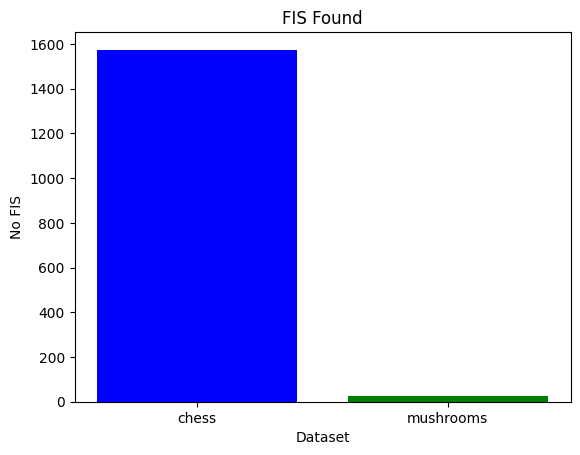

In [18]:
FIS = []
FIS.append(chess_fin.outputCount)
FIS.append(mushrooms_fin.outputCount)

# Bar plot
plt.bar(range(len(FIS)), FIS, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('No FIS')
plt.title('FIS Found')
plt.xticks(range(len(FIS)), ['chess', 'mushrooms'])
plt.show()

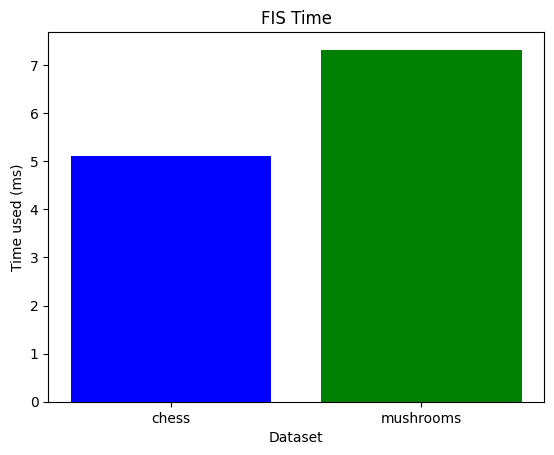

In [19]:
FIS_time = []
FIS_time.append(chess_fin.endTimestamp - chess_fin.startTimestamp)
FIS_time.append(mushrooms_fin.endTimestamp - mushrooms_fin.startTimestamp)

plt.bar(range(len(FIS_time)), FIS_time, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Time used (ms)')
plt.title('FIS Time')
plt.xticks(range(len(FIS_time)), ['chess', 'mushrooms'])
plt.show()

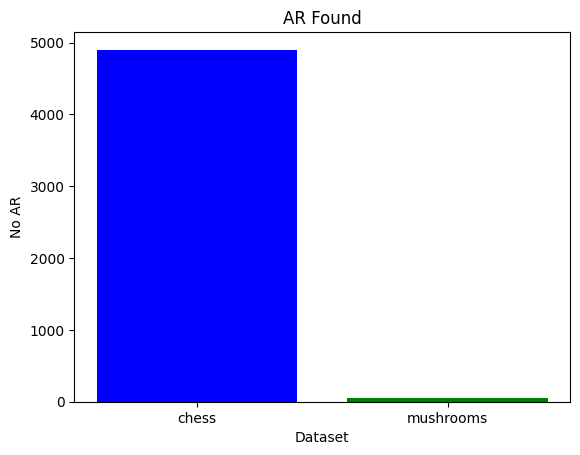

In [20]:
AR = []
AR.append(chess_algoAgrawal.ruleCount)
AR.append(mushrooms_algoAgrawal.ruleCount)

# Bar plot
plt.bar(range(len(AR)), AR, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('No AR')
plt.title('AR Found')
plt.xticks(range(len(AR)), ['chess', 'mushrooms'])
plt.show()

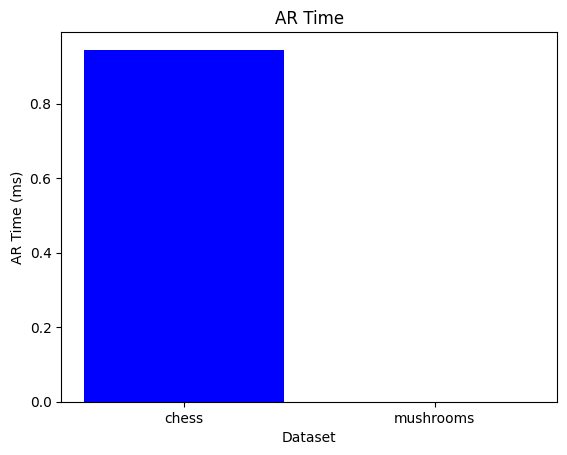

In [21]:
AR_time = []
AR_time.append(chess_algoAgrawal.endTimestamp - chess_algoAgrawal.startTimestamp)
AR_time.append(mushrooms_algoAgrawal.endTimestamp - mushrooms_algoAgrawal.startTimestamp)

# Bar plot
plt.bar(range(len(AR_time)), AR_time, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('AR Time (ms)')
plt.title('AR Time')
plt.xticks(range(len(AR_time)), ['chess', 'mushrooms'])
plt.show()

# Website dataset

In [50]:
minsup = 0.015
minconf = 0.4

fin = FIN()
fin.runAlgorithm(transaction_data, minsup, None)
patterns = fin.getFrequentItemsets()
databaseSize = fin.numOfTrans
#patterns.printItemsets(databaseSize)
fin.printStats()

algoAgrawal = AlgoAgrawal94()
algoAgrawal.setMaxAntecedentLength(maxAntecedentLength);
algoAgrawal.setMaxConsequentLength(maxConsequentLength);
rules = algoAgrawal.runAlgorithm(patterns, out_trans, databaseSize, minconf);
algoAgrawal.printStats()

FIN - STATS:
 Min support: 15
 Number of transactions: 1000
 Number of frequent  itemsets: 412
 Total time ~: 1.3985066413879395 ms
ASSOCIATION RULE GENERATION - STATS:
 Number of association rules generated : 439
 Total time ~ 0.18535947799682617 ms


In [53]:
file_path = 'output_trans_data.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

text_to_find = '1010001'

max_confidence = -1
max_confidence_line = None

for line in lines:
    if text_to_find == line.split(' ==> ')[0]:
        confidence = float(line.split('#CONF: ')[1])
        if confidence > max_confidence:
            max_confidence = confidence
            max_confidence_line = line

if max_confidence_line is not None:
    print(max_confidence_line)
else:
    print(f"No transaction with {text_to_find} found.")

1010001 ==> 1080001 #SUP: 40 #CONF: 0.7272727272727273

